In [ ]:
from scipy.stats import cauchy, uniform, norm, f, kstwobign, poisson
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

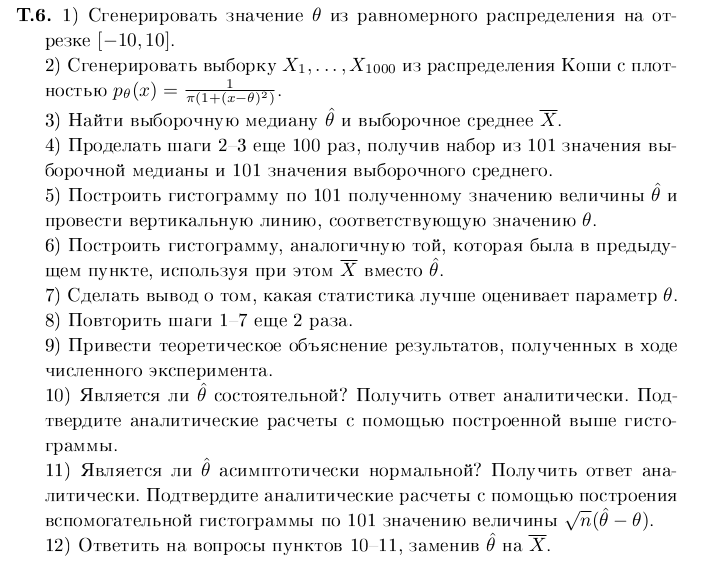

In [ ]:
sel_size = 1000
count_sel = 101
num_experiments = 3

def get_statistics(theta: float, distribution, statistic1, statistic2):
  statistics1 = np.zeros(count_sel)
  statistics2 = np.zeros(count_sel)
  for i in range(count_sel):
    selection = distribution(theta)
    statistics1[i] = statistic1(selection)
    statistics2[i] = statistic2(selection)
  return statistics1, statistics2

def plot_statistics(theta: float, statistics1, statistics2, title1, title2):
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.hist(statistics1, bins=30, color='c', edgecolor='k', alpha=0.65)
  plt.title(title1)
  plt.axvline(theta, color='k', linestyle='dashed', linewidth=1)
  plt.subplot(132)
  plt.hist(statistics2, bins=30, color='c', edgecolor='k', alpha=0.65)
  plt.title(title2)
  plt.axvline(theta, color='k', linestyle='dashed', linewidth=1)
  plt.show()

def plot_asymptotic_normally(theta: float, statistics1, statistics2, var1: float, var2: float = 0, title1='median', title2='mean'):
  to_value = lambda x: np.sqrt(count_sel) * (x - theta)
  aplyall = np.vectorize(to_value)
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  count, bins, ignored = plt.hist(aplyall(medians), bins=30, density=True)
  mu = 0
  plt.plot(bins, 1/(np.sqrt(2 * np.pi * var1)) *
               np.exp( - (bins - mu)**2 / (2 * var1)),
         linewidth=2, color='r')
  plt.title(title1)
  plt.subplot(132)
  count, bins, ignored = plt.hist(aplyall(means), bins=30, density=True)
  if var2 != 0:
      plt.plot(bins, 1/(np.sqrt(2 * np.pi * var2)) *
               np.exp( - (bins - mu)**2 / (2 * var2)),
         linewidth=2, color='r')
  plt.title(title2)
  plt.show()

def check_statistics(distribution, statistic1=np.median, statistic2=np.mean, title1='median', title2='mean'):
  statistics = []
  for i in range(num_experiments):
    theta = uniform.rvs(loc=0, scale=20)
    statistics1, statistics2 = get_statistics(theta, distribution, statistic1, statistic2)
    statistics.append((theta, statistics1, statistics2))
    plot_statistics(theta, statistics1, statistics2, title1, title2)
  return statistics

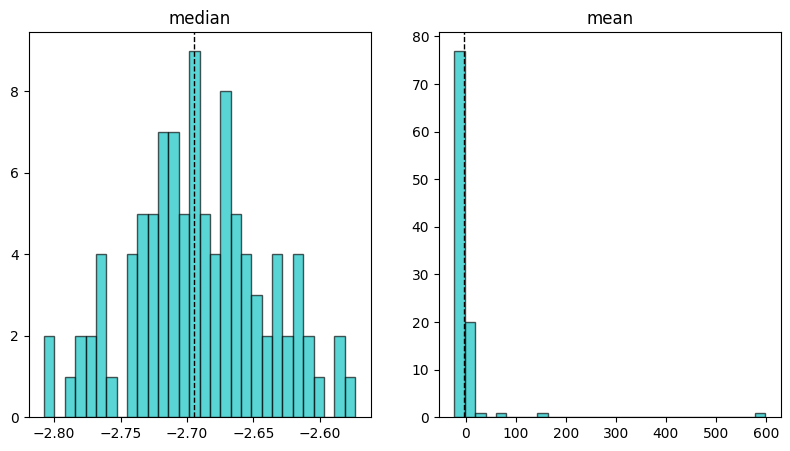

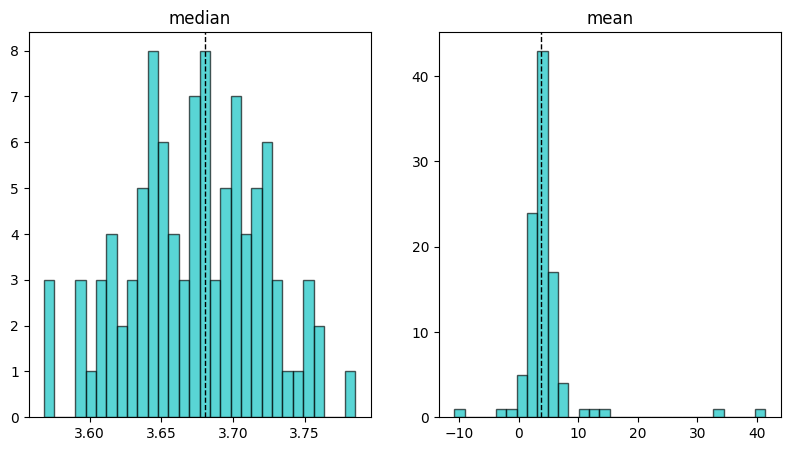

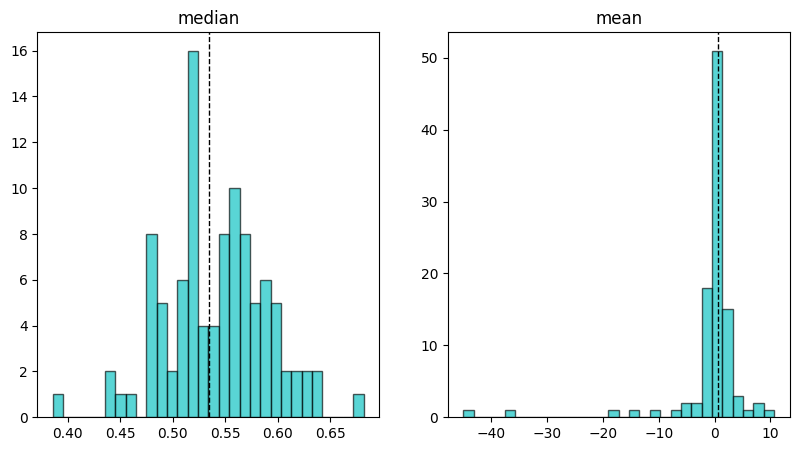

In [ ]:
cuachy_statistics = check_statistics(lambda theta : cauchy.rvs(loc=theta, size=sel_size))

Видно, что в случае среднего, статистика может принимать большие значения и сильно отличатся от настоящего параметра, чего нет у медианаы
Дело в том, что $\overline{X} - $ сильно состоятельная оценка матожидания, а матожидание у распределения Коши не существует
По теореме о выборочной медиане, выборочная медиана является асимптотически нормальной оценкой $z_{1/2} = \theta$ с асимптотической дисперсией $\frac{\pi}{4}$, а следовательно и состоятельной оценкой $\theta$.

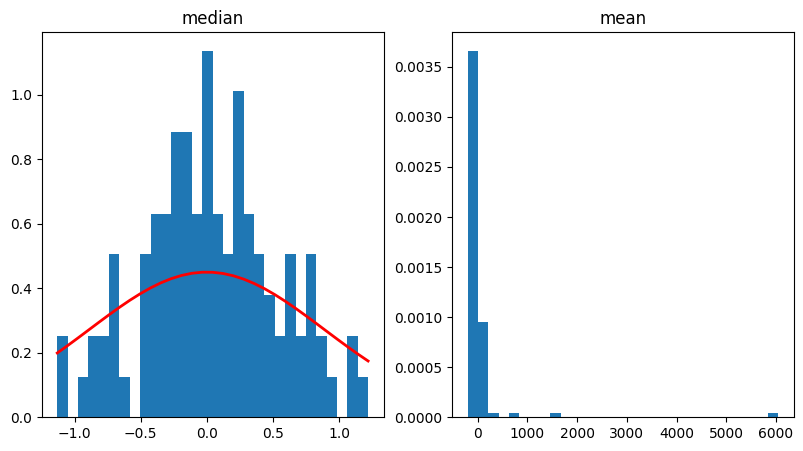

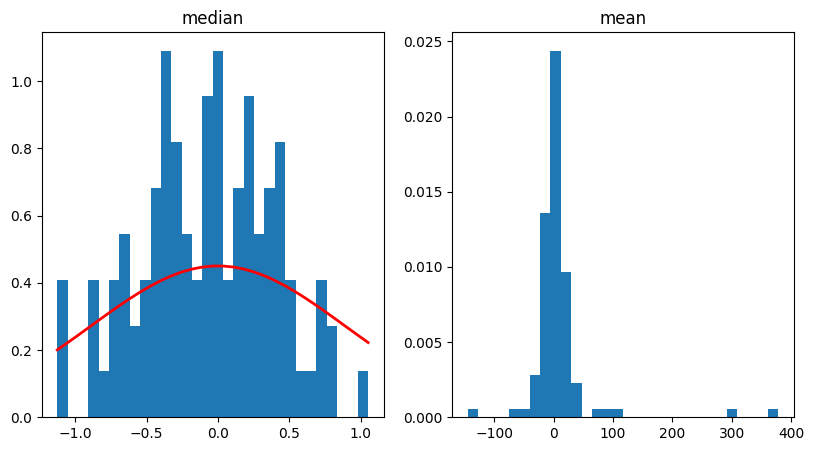

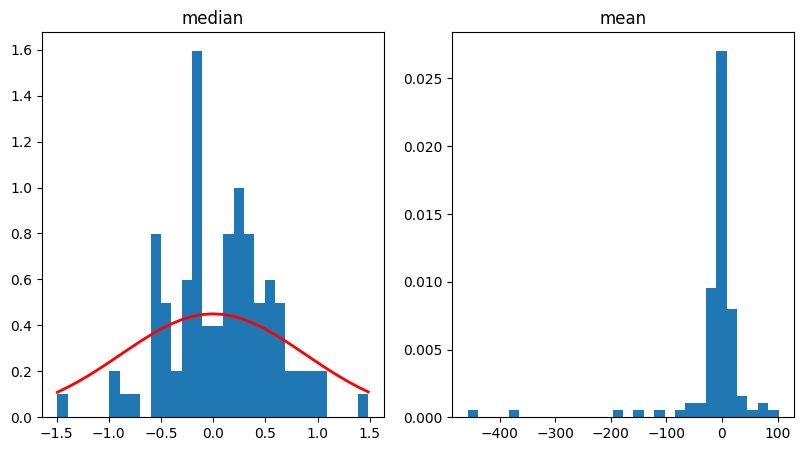

In [ ]:
for theta, medians, means in cuachy_statistics:
  plot_asymptotic_normally(theta, medians, means, np.pi/4)

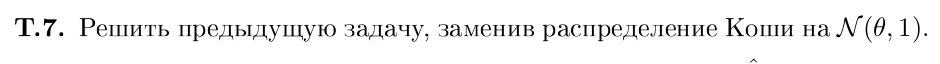

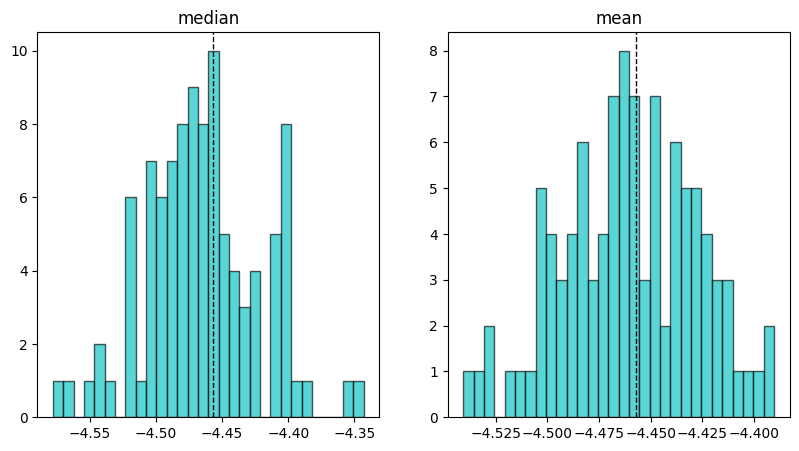

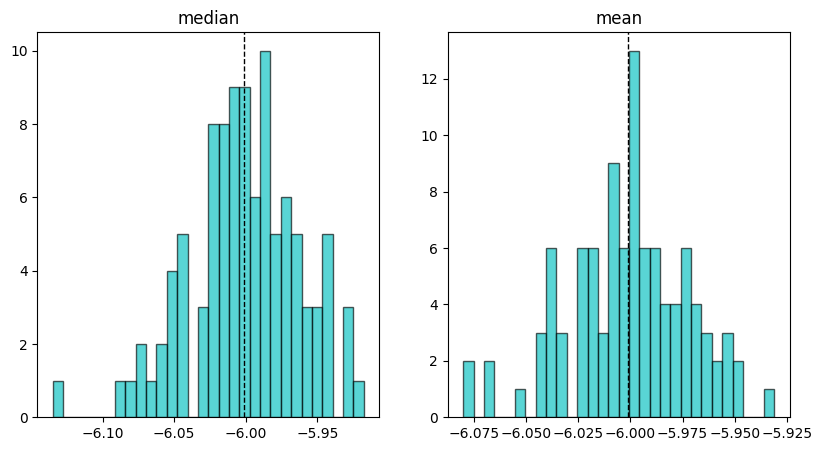

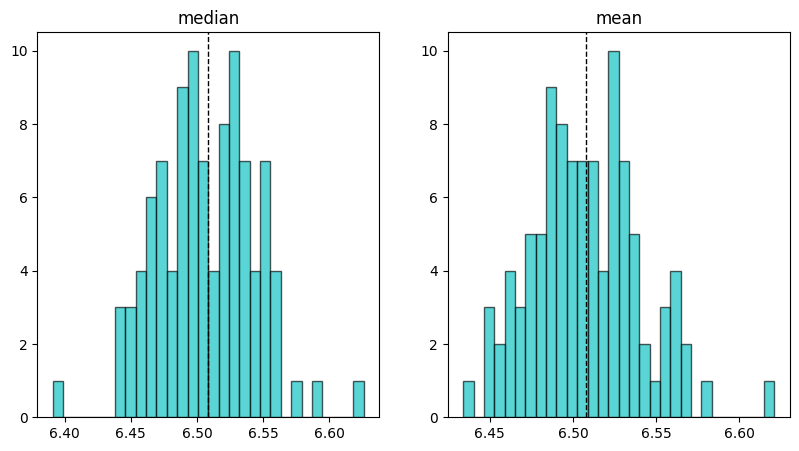

In [ ]:
normal_statistics = check_statistics(lambda theta : norm.rvs(loc=theta, size=sel_size))

На диаграммах видно, что разброс относительно верного значения у выборочной медианы больше. По УЗБЧ $\overline{X}$ - сильно состоятельная оценка $\theta$, а по ЦПТ $\overline{X}$ - асимптотически нормальная оценка с асимптотической дисперисией 1. Выборочная медиана же асимптотически нормальная(по всё той же теореме) с асимптотической дисперсией $\frac{\pi}{2} →$ выборочное среднее лучше в асимптотическом подходе чем выборочная медиана, что отражено на графике.

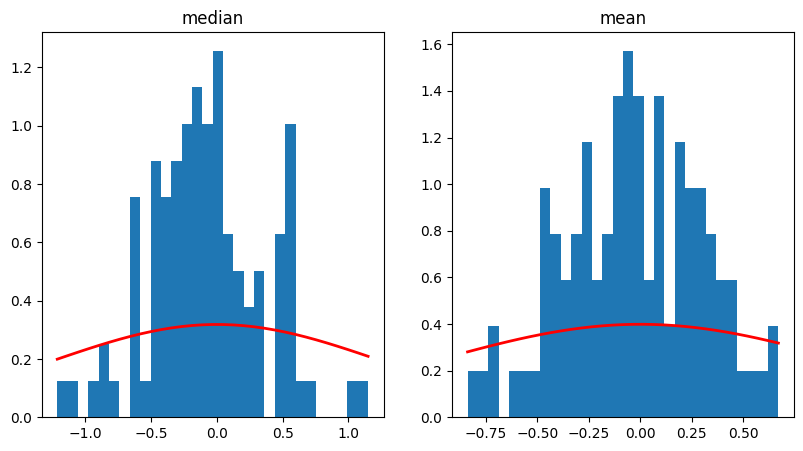

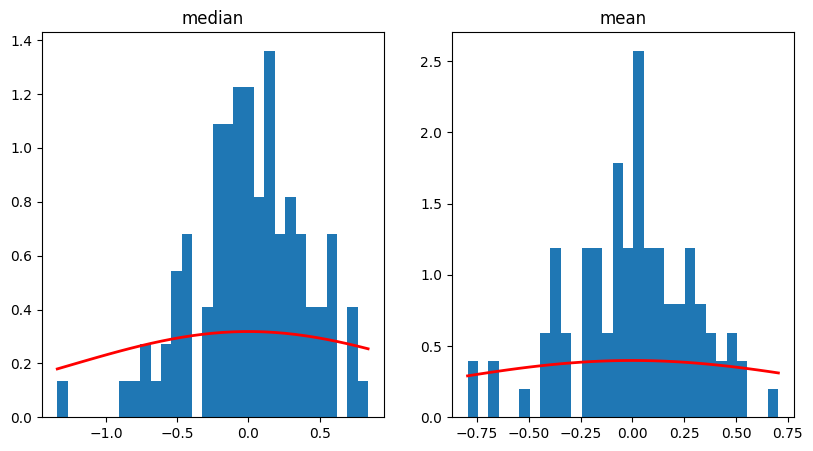

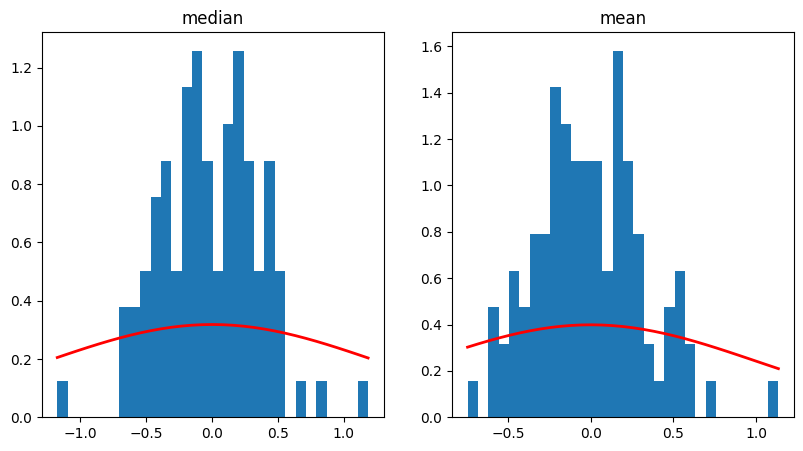

In [ ]:
for theta, medians, means in normal_statistics:
  plot_asymptotic_normally(theta, medians, means, count_sel, np.pi/2, 1)

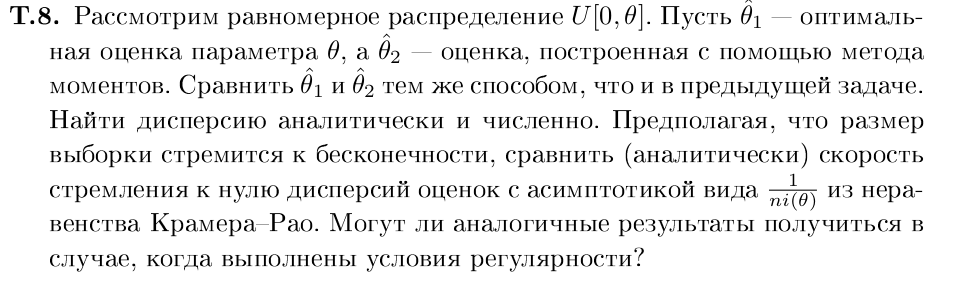

Указанные в условии статистики это $\hat{\theta_1} = \frac{n + 1}{n}X_{(n)}, \hat{\theta_2} = 2\overline{X}$

In [ ]:
theta_1 = lambda selection : (sel_size + 1) / sel_size * np.max(selection)
theta_2 = lambda selection : 2 * np.mean(selection)

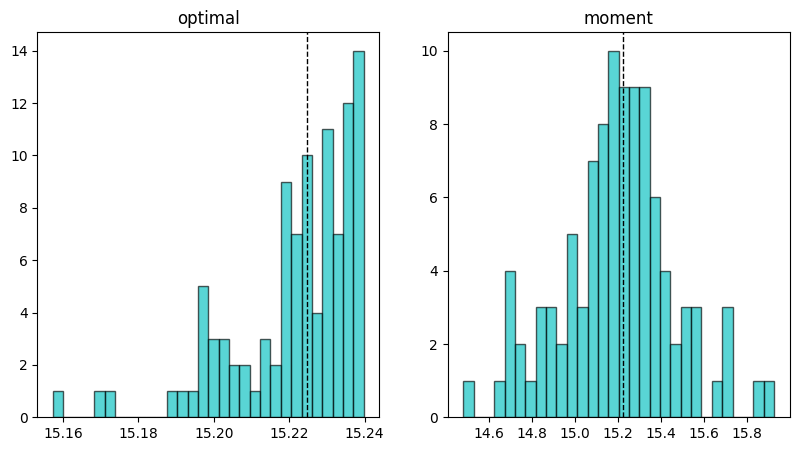

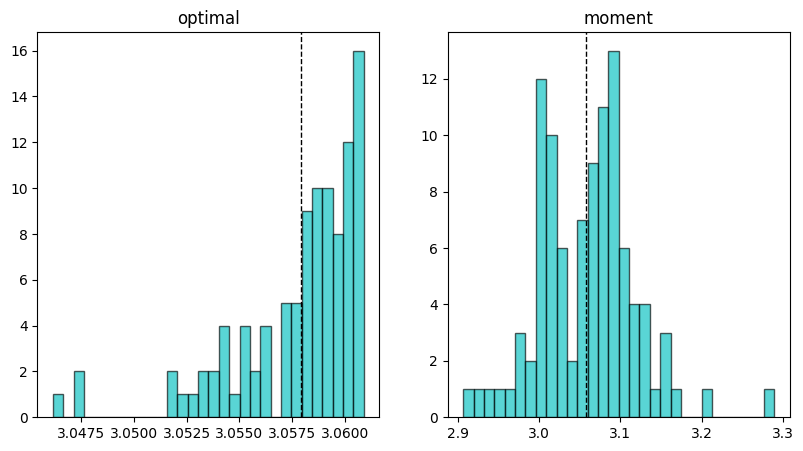

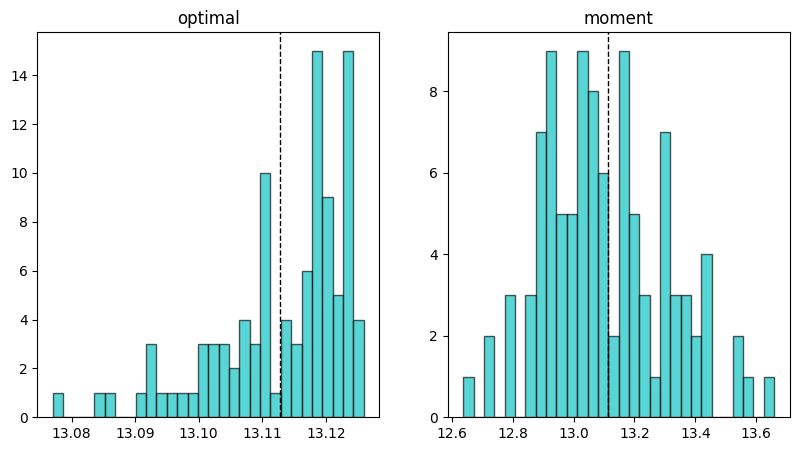

In [ ]:
uniform_statistics = check_statistics(lambda theta : uniform.rvs(scale=theta, size=sel_size), theta_1, theta_2, 'optimal', 'moment')

$$\mathbb{E} X_{(n)}^2 = \int_{0}^{\theta} nx^2 \frac{x^{n - 1}}{\theta^n}dx = \theta^2 \frac{n}{n + 2} \rightarrow \mathbb{D} X_{(n)} = \theta^2n \left( \frac{1}{(n + 2)} - \frac{n}{(n + 1)^2}\right) = \theta^2 \frac{n}{(n + 1)^2(n + 2)} \rightarrow \mathbb{D} \frac{n + 1}{n}X_{(n)} = \frac{\theta^2}{(n + 1)(n + 2)}$$

$$\mathbb{D}(2 \overline{X}) = \frac{4}{n} \mathbb{D} X_1 =  \frac{\theta^2}{3n}$$ Тогда  

In [ ]:
for theta, theta_1, theta_2 in uniform_statistics:
  print(f'Численная дисперсия theta_1: {np.var(np.array(theta_1))}, аналитическая дисперсия theta_1: {theta**2 / ((sel_size + 1) * (sel_size + 2))}')
  print(f'Численная дисперсия theta_2: {np.var(np.array(theta_2))}, аналитическая дисперсия theta_2: {theta**2 / (3 * sel_size)}')

Численная дисперсия theta_1: 0.0002641160366777177, аналитическая дисперсия theta_1: 0.00023109724538513264
Численная дисперсия theta_2: 0.06966663956158778, аналитическая дисперсия theta_2: 0.07726366643859293
Численная дисперсия theta_1: 8.847933569748083e-06, аналитическая дисперсия theta_1: 9.322786139144725e-06
Численная дисперсия theta_2: 0.0035198493101683027, аналитическая дисперсия theta_2: 0.0031169243810448125
Численная дисперсия theta_1: 0.00010785811130130217, аналитическая дисперсия theta_1: 0.00017143243646345921
Численная дисперсия theta_2: 0.0418583668689017, аналитическая дисперсия theta_2: 0.057315692212574175


Сравнивая со скоростю сходимости в неравенстве Рао-Крамера, получаем, что скорость сходимост у оптимальной оценки выше, а у оценки по методу моментов такая же. Если бы были выполнены условия регулярности, то можно было бы применить неравенство Рао-Крамера и тогда любая оценка имела бы скорость сходимости $\Omega(\frac{1}{n}), n \to \infty$. То есть таких результатов не получилось бы

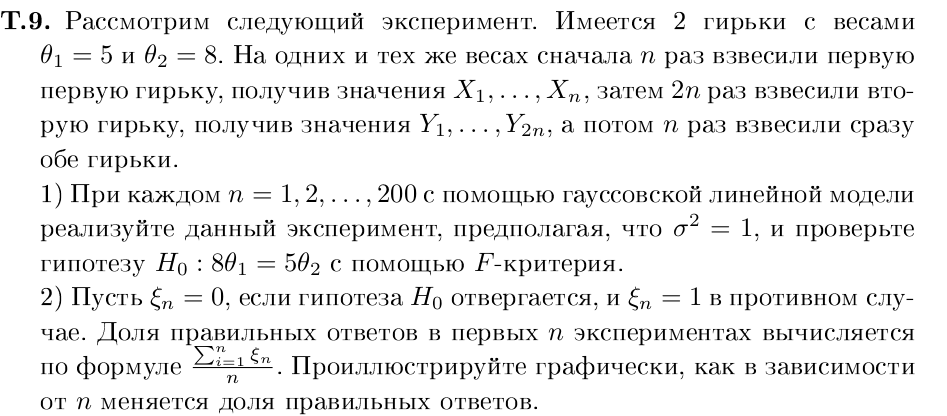

Пусть $D = (Z^TZ)^{-1}, \hat{\theta} = DZ^TX, \hat{t} = A \hat{\theta}, B = ADA^T$. F - критерий выглядит следующим образом:
$$\frac{(\hat{t} - \beta_0)^TB^{-1}(\hat{t} - \beta_0)}{||X - Z\hat{\theta}||^2} \frac{4n - 2}{1} > f_{1 - \alpha}(1, 4n - 2)$$

In [ ]:
def get_lin_regression(n):
  sigma = 1
  theta_1 = 5
  theta_2 = 8
  theta = np.array([theta_1, theta_2])
  Z = np.zeros((4 * n, 2))
  for i in range(n):
    Z[i][0] = 1
    Z[i + n][1] = 1
    Z[2 * n + i][1] = 1
    Z[3 * n + i] = [1, 1]

  eps = norm.rvs(scale=1, size=4*n)
  X = Z @ theta + eps
  return X, Z

In [ ]:
def check_F(X, Z, A, beta_0 = 0, alpha=0.05) -> bool:
  D = np.array(np.linalg.inv(Z.T @ Z))
  hat_theta = np.array(D @ Z.T @ X)
  hat_t = np.array(A @ hat_theta)
  B = A @ D @ A.T
  if B.size > 1:
    inv_B = np.linalg.inv(B)
  else:
    inv_B = np.array(1 / B)
  return np.array(hat_t.T.dot(inv_B)).dot(hat_t) * (Z.shape[0] - 2) > np.sum((X - Z @ hat_theta) ** 2) * f.ppf(q=1-alpha, dfn=1, dfd=Z.shape[0] - 2)

In [ ]:
def check_hypothesis(A, beta_0 = 0, max_n = 200, alpha=0.05) -> list[int]:
  """
  for n in [1, max_n] model linear regression and check hypothesis A theta = beta_0 and return
  list of [xi_n], where xi_n = 1 if H_1 is true
  """
  res = [0] * max_n
  for n in range(1, max_n + 1):
    X, Z = get_lin_regression(n)
    res[n - 1] = int(check_F(X, Z, A, beta_0, alpha))
  return res

def plot_res(res: list[int], alpha=0.05):
  pref_sum = [res[0]] * len(res)
  for i in range(1, len(res)):
    pref_sum[i] = pref_sum[i - 1] + res[i]
  frac_true = [pref_sum[i] / (i + 1) for i in range(len(res))]
  plt.plot(range(len(res)), frac_true)
  plt.ylabel("Доля раз, когда отвергли H_0")
  if alpha < 1:
    plt.plot(range(len(res)), [alpha for _ in range(len(res))])
    plt.annotate(xy=(len(res) / 2, alpha), text="alpha", xytext=(2 * len(res) / 3, alpha + 0.15 * (max(frac_true) - min(frac_true))), arrowprops=dict(facecolor='black', shrink=0.001))

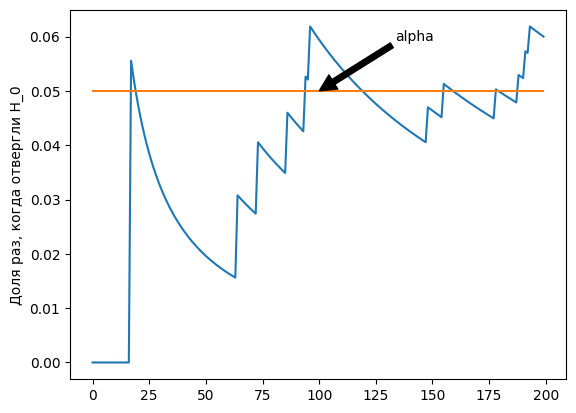

In [ ]:
res_1 = check_hypothesis(np.array([8, -5]), max_n = 200)
plot_res(res_1)

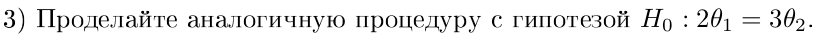

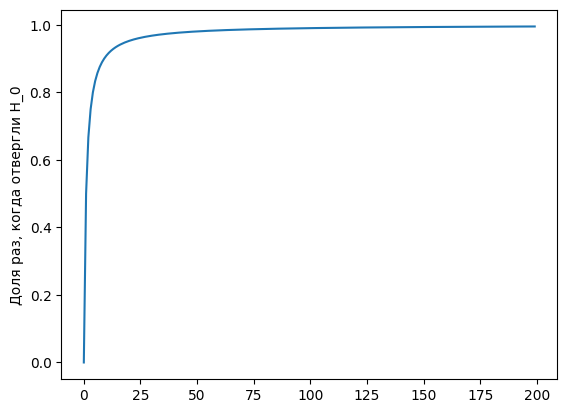

In [ ]:
res_2 = check_hypothesis(np.array([2, -3]), max_n = 200)
plot_res(res_2, 1)

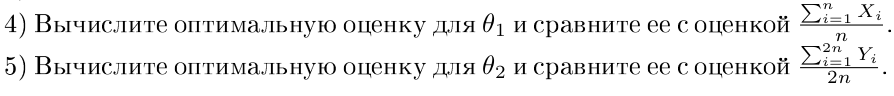

Я так понял, для n = 200 нужно посчитать

In [ ]:
def compare_stats(n=200):
  X, Z = get_lin_regression(n)
  D = np.array(np.linalg.inv(Z.T @ Z))
  hat_theta = np.array(D @ Z.T @ X)
  print(f'Оптимальная оценка theta_1: {hat_theta[0]}, предложенная оценка: {np.sum(X[0:n]) / n}')
  print(f'Относительное отклонение оптимальной, {abs(hat_theta[0]/5 - 1)}, отн. отклонение предложенной {abs(np.sum(X[0:n]) / (n * 5) - 1)}')
  print(f'Оптимальная оценка theta_2: {hat_theta[1]}, альтернативная оценка: {np.sum(X[n:3 * n]) / (2 * n)}')
  print(f'Относительное отклонение оптимальной, {abs(hat_theta[1]/8 - 1)}, отн. отклонение предложенной {abs(np.sum(X[n:3 * n]) / (2 * n * 5) - 1)}')

compare_stats()

Оптимальная оценка theta_1: 4.984956966415707, предложенная оценка: 5.021039514390301
Относительное отклонение оптимальной, 0.0030086067168586528, отн. отклонение предложенной 0.004207902878060166
Оптимальная оценка theta_2: 7.967052046257857, альтернативная оценка: 7.9850933202451575
Относительное отклонение оптимальной, 0.004118494217767887, отн. отклонение предложенной 0.5970186640490316


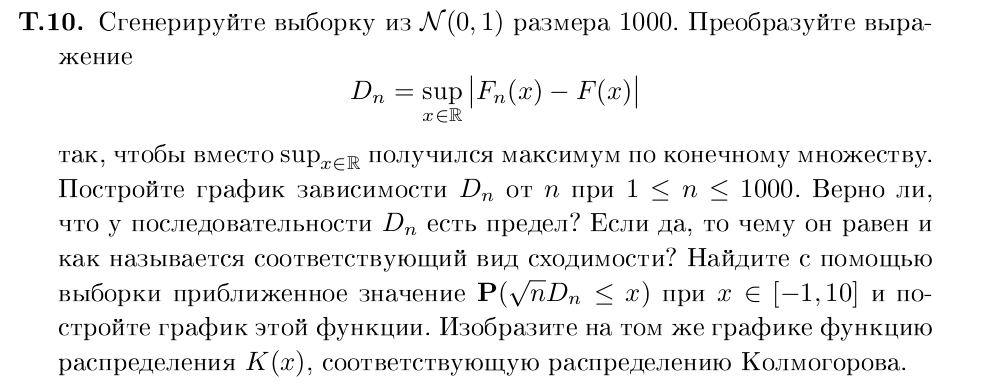
Преобразуем следующим образом
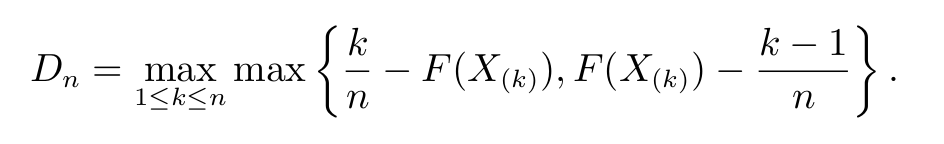

In [ ]:
def calc_dn(selection):
  dn = 0
  selection = np.sort(selection)
  for k in range(len(selection)):
    dn = max(dn, max((k + 1) / len(selection) - norm.cdf(selection[k]),
                     norm.cdf(selection[k]) - k / len(selection)))
  return dn

def plot_dn(dns):
  plt.figure(figsize=(10, 7))
  plt.plot(range(len(dns)), dns)

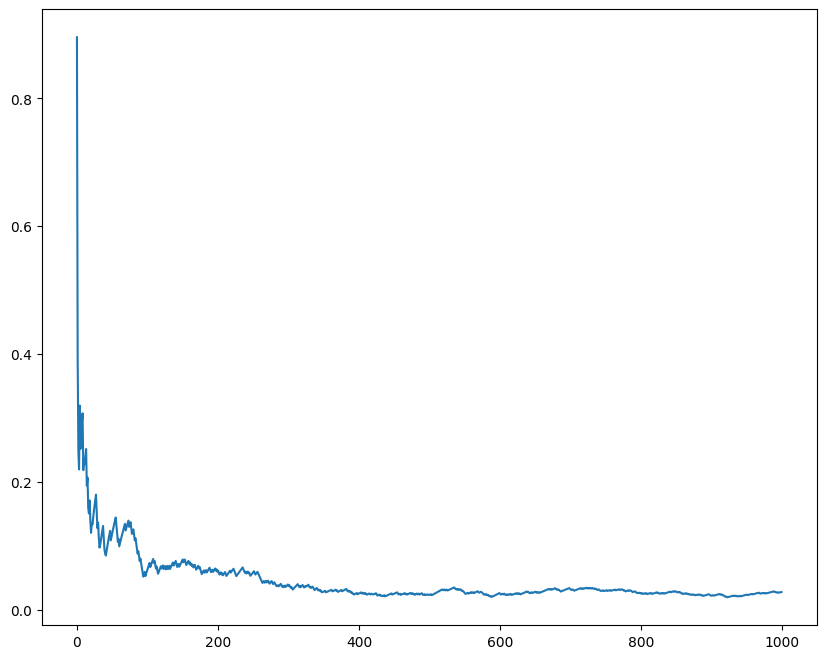

In [ ]:
selection = norm.rvs(size=sel_size)
dns = [calc_dn(selection[:n+1]) for n in range(len(selection))]
plot_dn(dns)

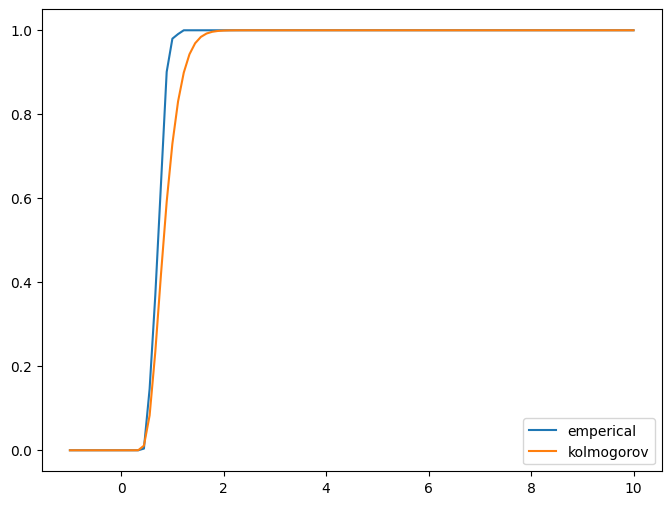

In [ ]:
stats = [np.sqrt(i + 1) * dns[i] for i in range(len(dns))]
ecdf = ECDF(stats)
x = np.linspace(-1, 10, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, ecdf(x), label='emperical')
plt.plot(x, kstwobign.cdf(x), label='kolmogorov')
plt.legend()
plt.show()

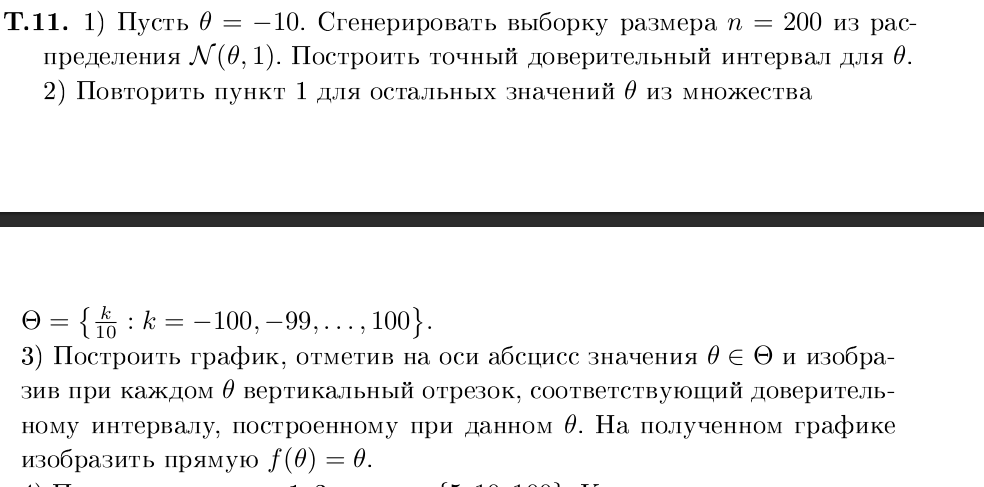

Точный доверительные интервал уровня значимости $\alpha$ равен $\left(\overline{X} + \frac{z_{\alpha/2}}{\sqrt{n}}, \overline{X} - \frac{z_{\alpha/2}}{\sqrt{n}} \right)$, где $z_p$ - кванитль уровня $p$ стандартного нормального закона(см. в задаче 18 второго задания).

In [ ]:
def get_confidence_interval(selection, alpha=0.05) -> (float, float):
  z_alpha_half = norm.ppf(q=alpha/2)
  X_average = selection.mean()
  return X_average + z_alpha_half / np.sqrt(len(selection)), X_average - z_alpha_half / np.sqrt(len(selection))

def plot_intervals(Theta: list[float], n: int, alpha=0.05, distribution=norm):
  lefts = []
  rights = []
  plt.figure(figsize=(25, 13))
  for theta in Theta:
    left, right = get_confidence_interval(norm.rvs(loc=theta, size=n), alpha=alpha)
    lefts.append(left)
    rights.append(right)
  #plt.vlines(x=Theta, ymin=[(left - min(lefts)) / (max(rights) - min(lefts)) for left in lefts], ymax=[(right - min(lefts)) / (max(rights) - min(lefts)) for right in rights], color='b', ls='--')
  plt.vlines(x=Theta, ymin=lefts, ymax=rights, color='r')
  plt.plot(Theta, Theta, ls='--', color='g', alpha=1)
  plt.grid()
  plt.show()

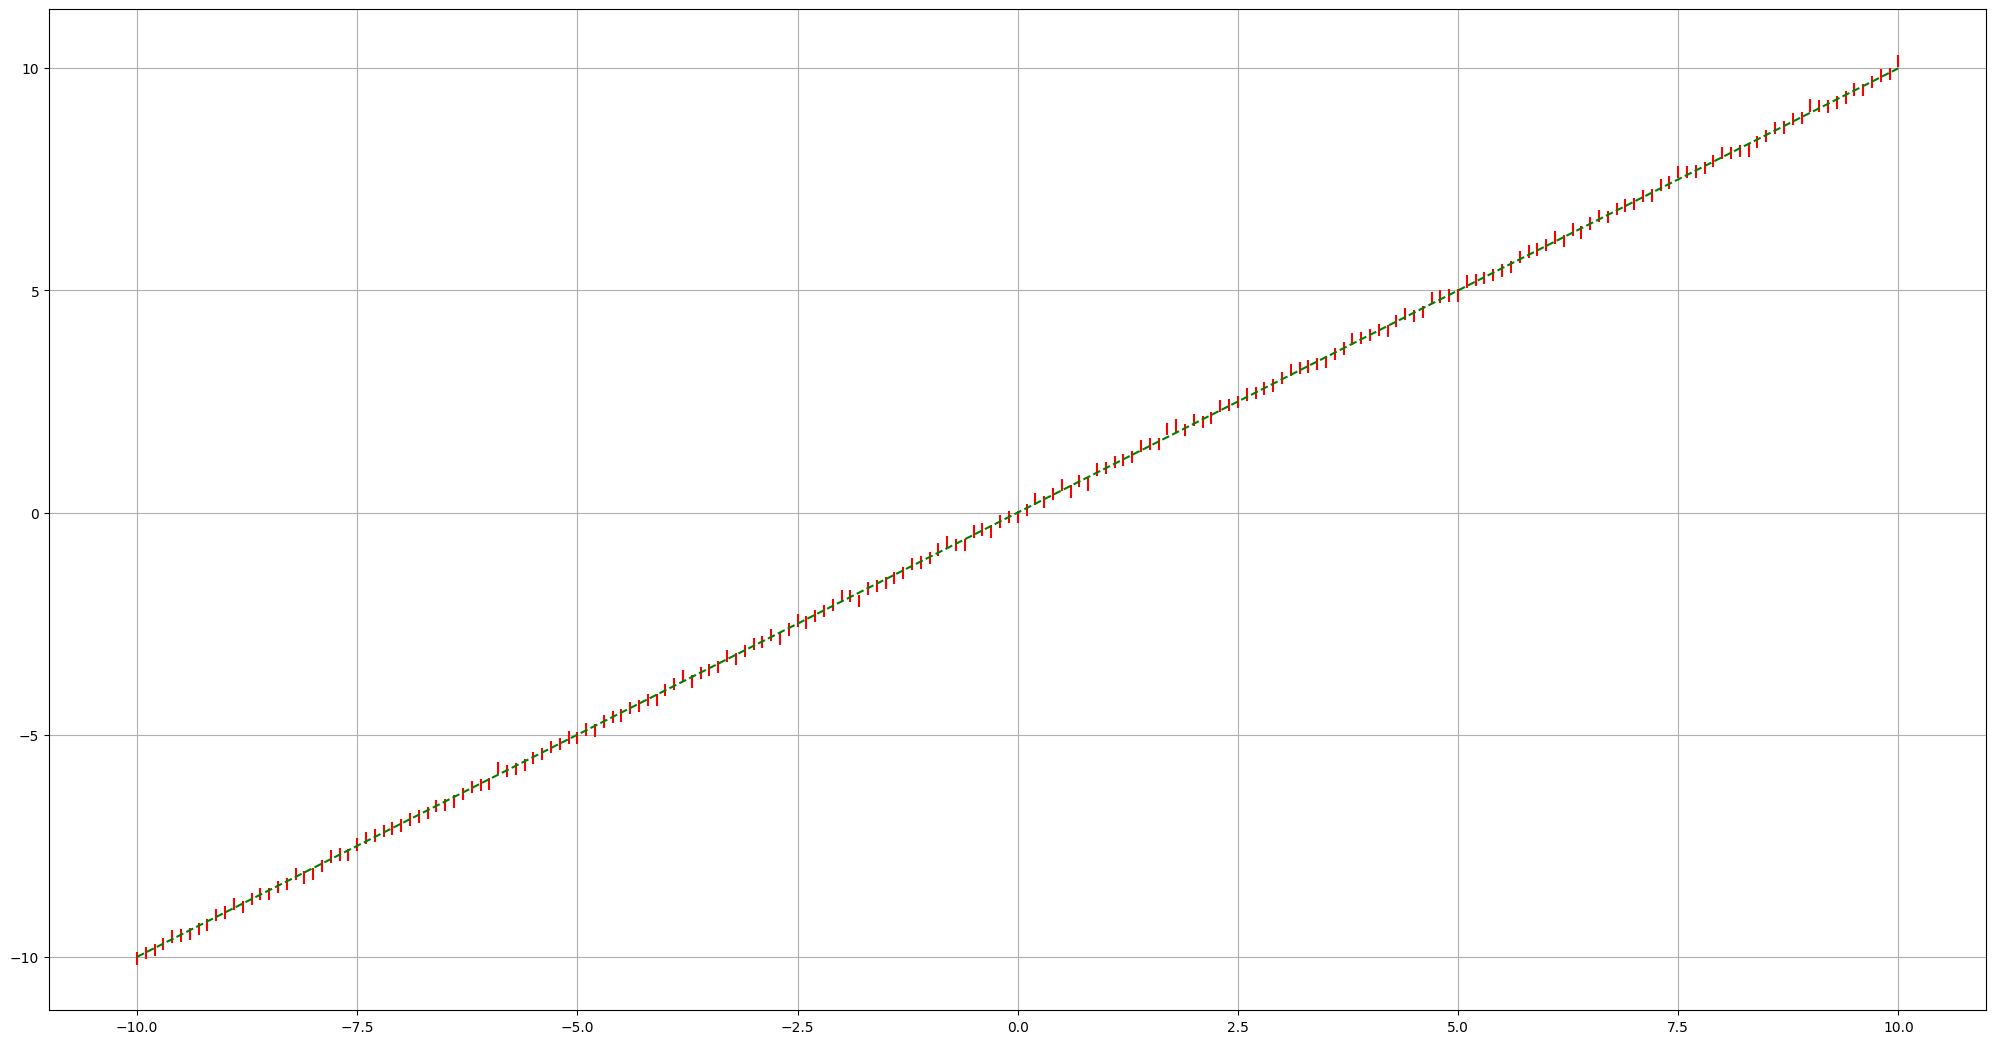

In [ ]:
alpha = 0.05
Theta = [k / 10 for k in range(-100, 101)]
plot_intervals(Theta, 200, alpha)

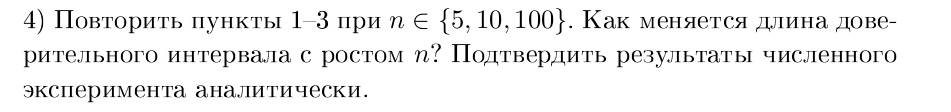

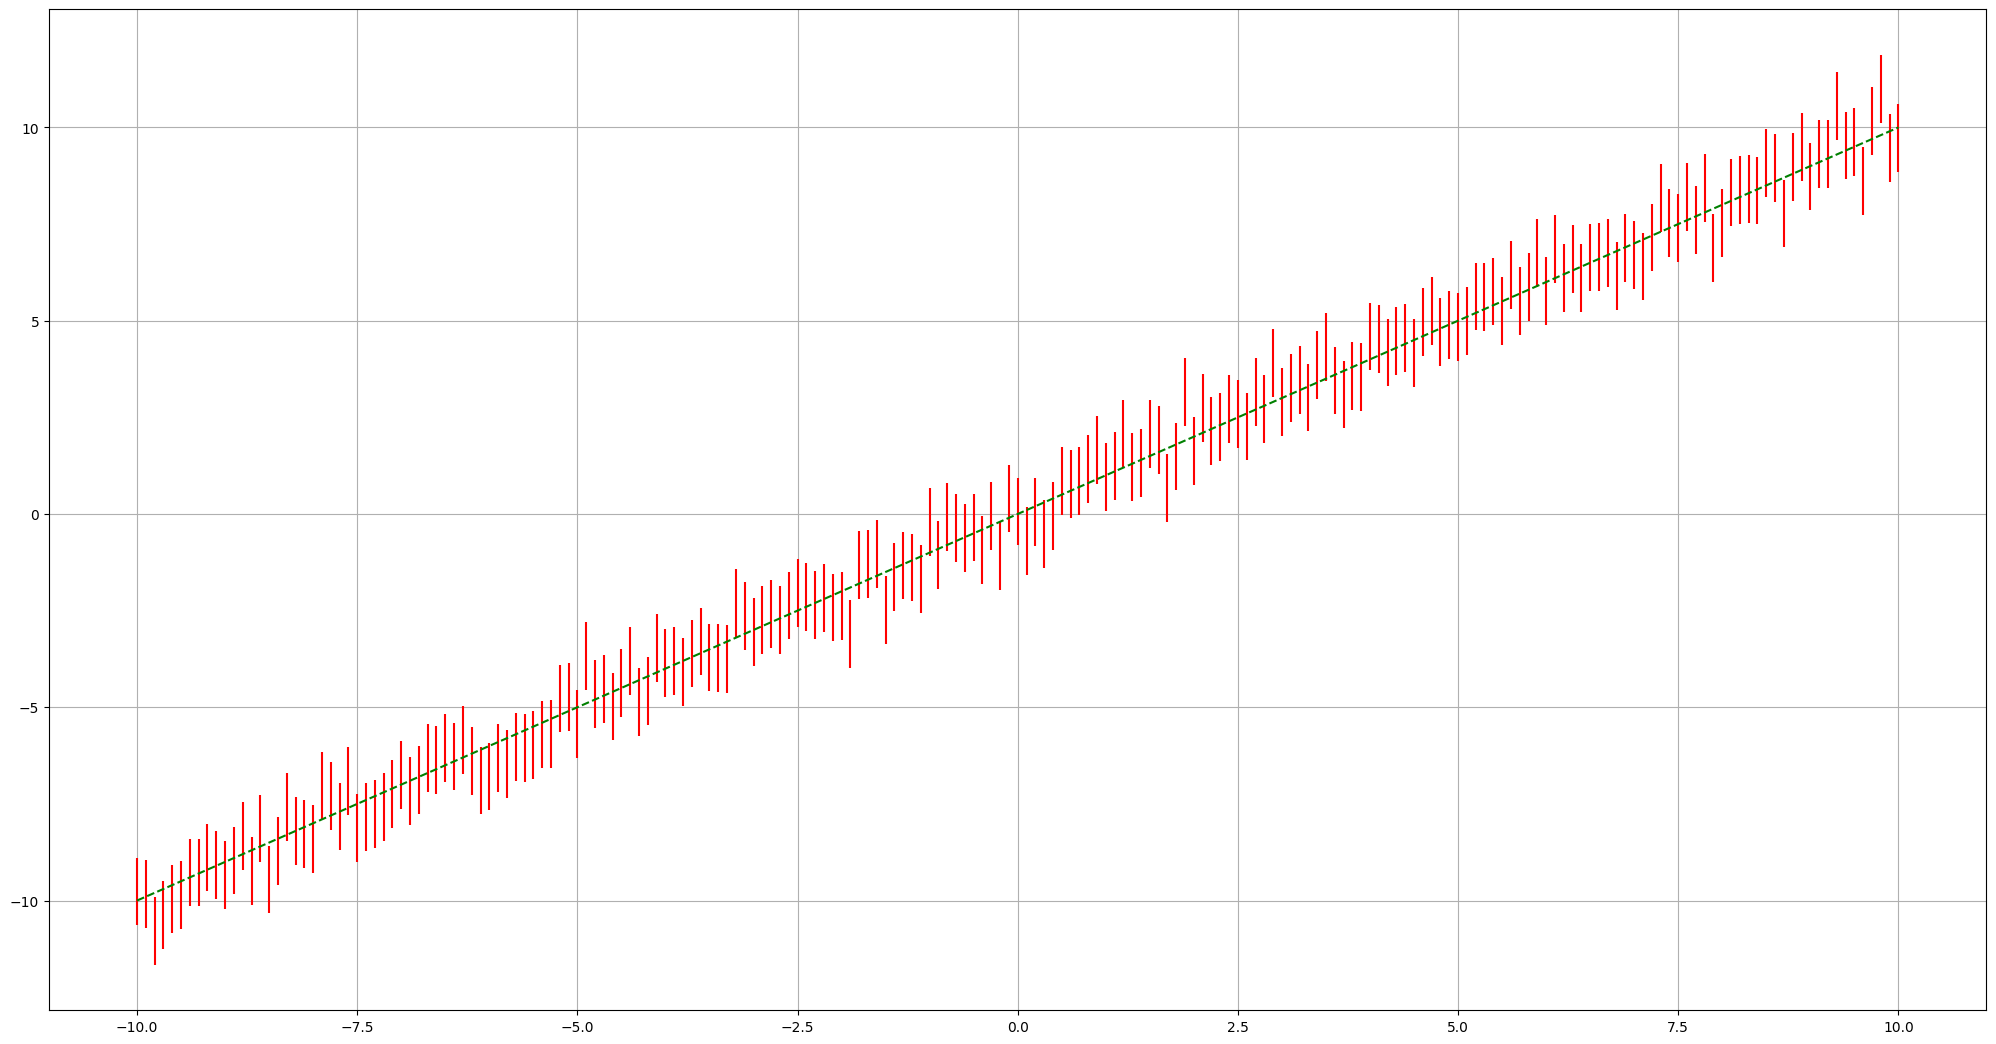

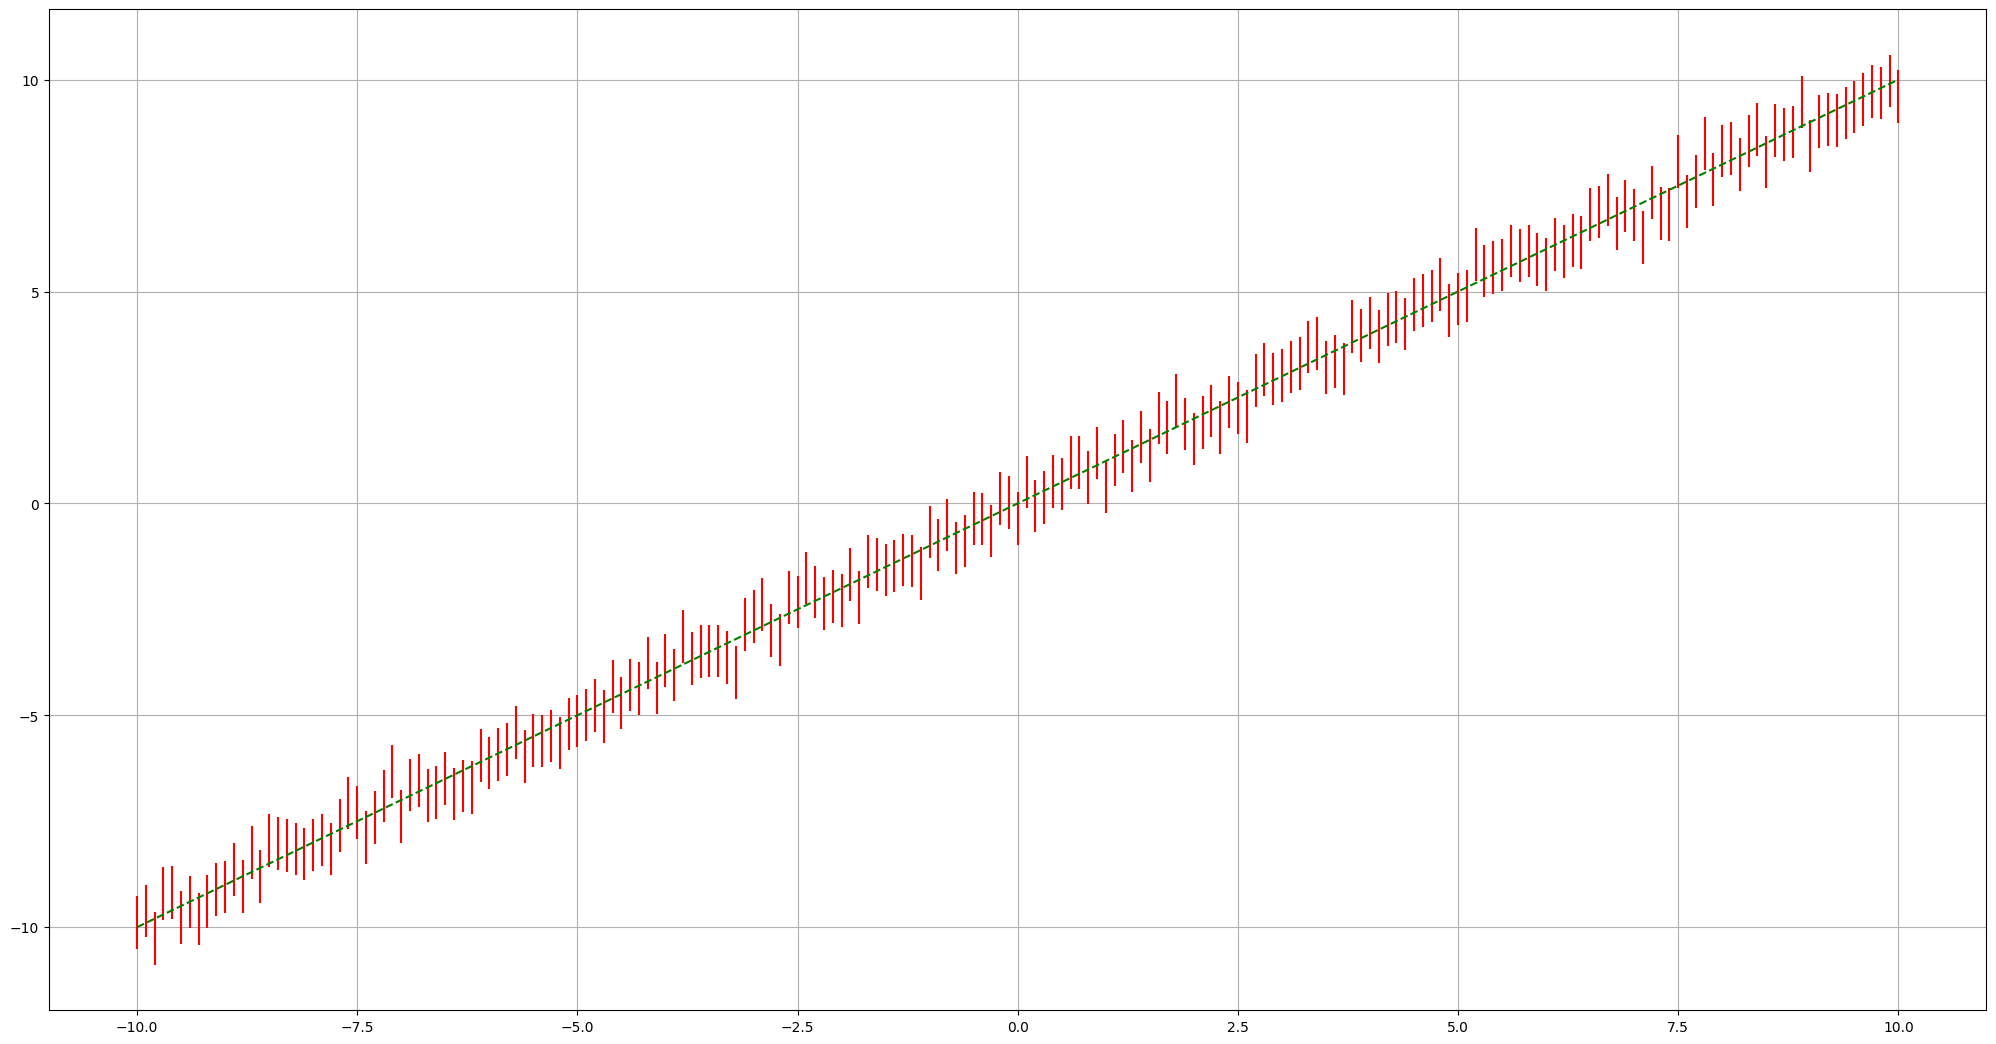

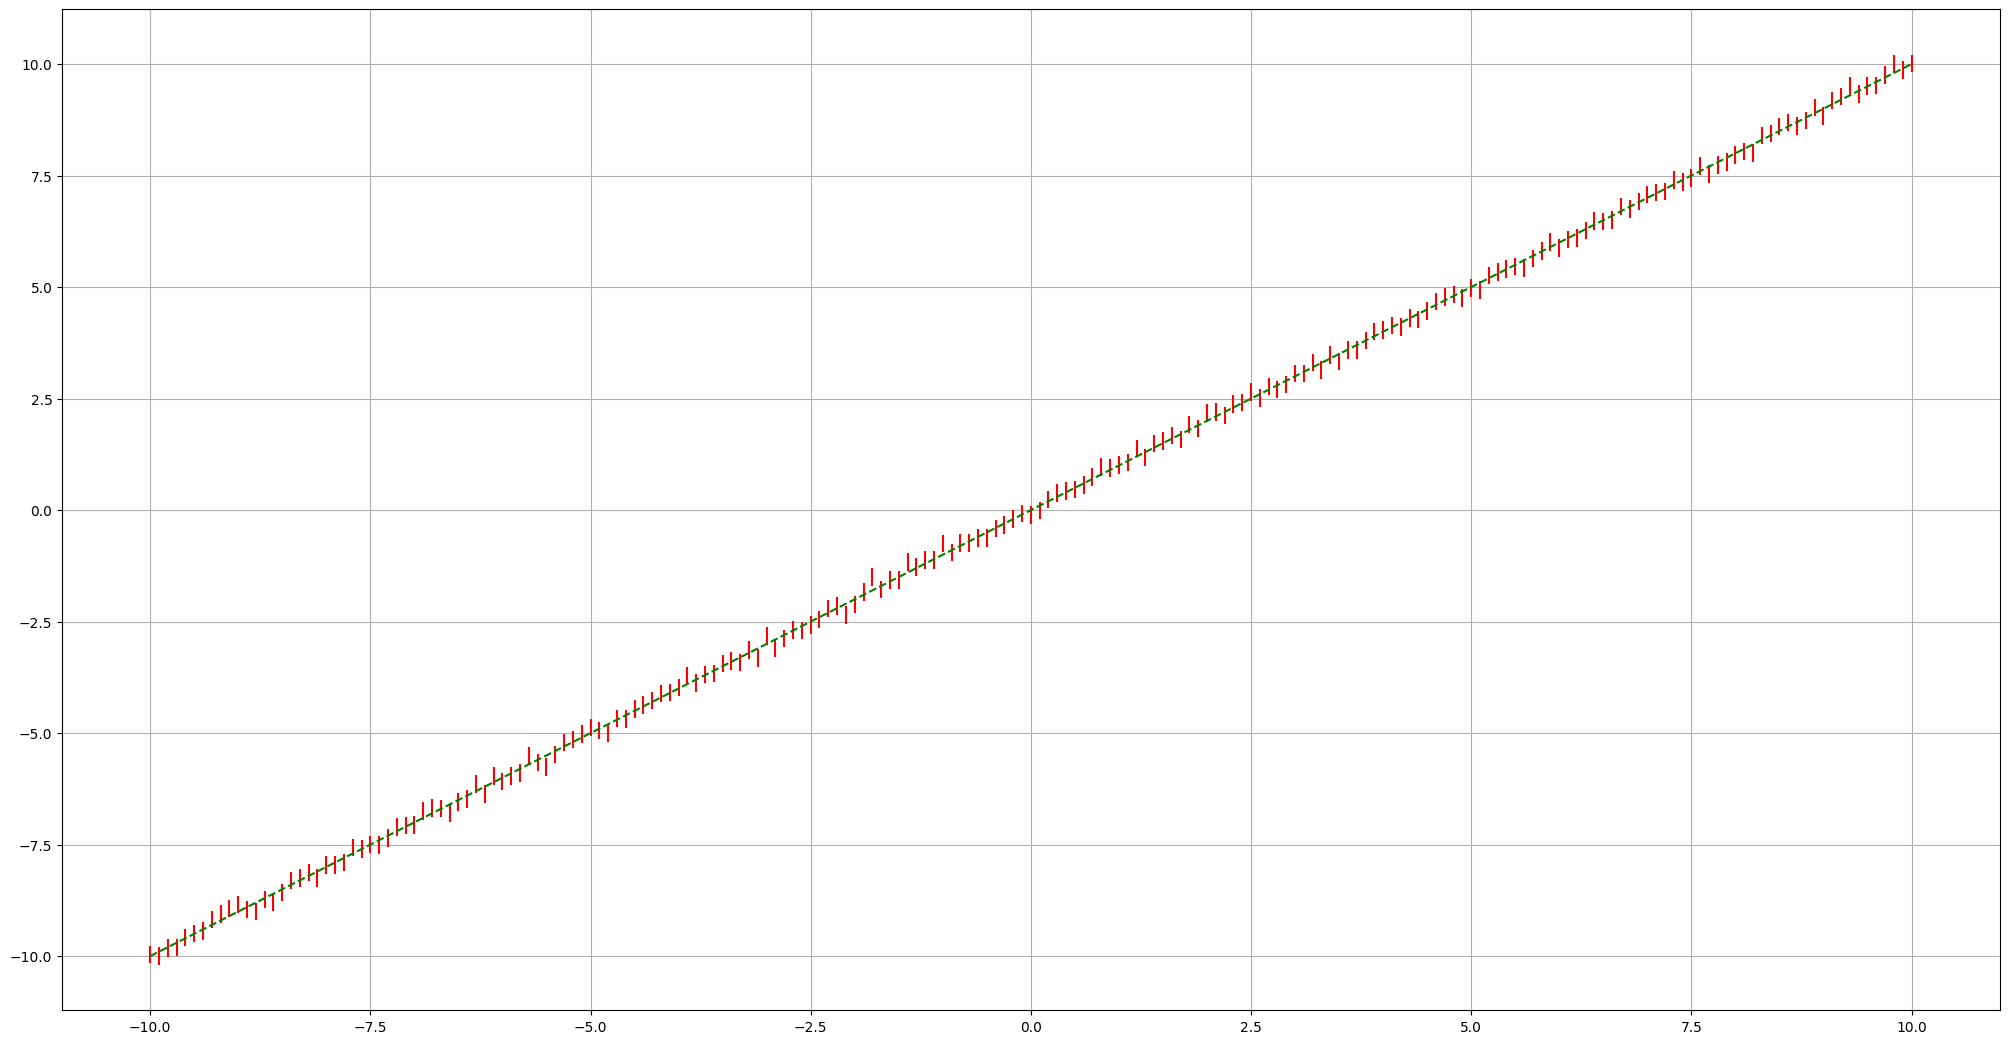

In [ ]:
ns = [5, 10, 100]
for n in ns:
  plot_intervals(Theta, n, alpha)

Длина доверительного интервала уменьшается, что легко заметить из формулы, причем его длина $\sim \frac{1}{\sqrt{n}}$

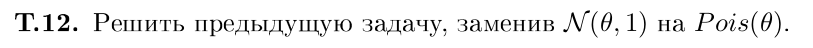

In [ ]:
plot_intervals(Theta, 200, alpha, poisson)

TypeError: plot_intervals() takes from 2 to 3 positional arguments but 4 were given

In [ ]:
import scipy
scipy.stats.norm.interval(0.5)
scipy.stats.norm.interval(0.5)

(-0.6744897501960817, 0.6744897501960817)